# Resize Image

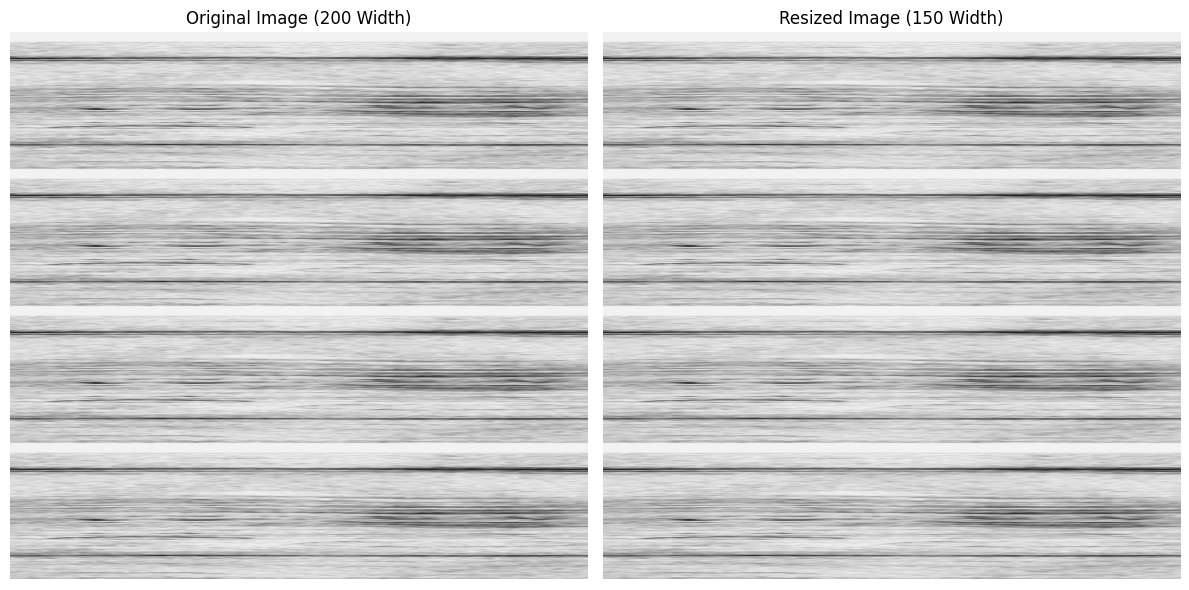

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Load CSV
df = pd.read_csv("Challenge2.csv")  # Adjust path if needed

# Extract image data (excluding depth column)
image_data = df.iloc[:, 1:].values  # Shape: (Height, Width) → (5461, 200)

# Resize width from 200 → 150 (keep height the same)
resized_image = resize(
    image_data,
    (image_data.shape[0], 150),
    anti_aliasing=True,
    preserve_range=True
)

# Plot original and resized image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image_data, cmap='gray', aspect='auto')
axes[0].set_title("Original Image (200 Width)")
axes[0].axis('off')

# Resized image
axes[1].imshow(resized_image, cmap='gray', aspect='auto')
axes[1].set_title("Resized Image (150 Width)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Optional: Save resized image as CSV
resized_df = pd.DataFrame(resized_image, columns=[f'col{i+1}' for i in range(150)])
resized_df.insert(0, 'depth', df['depth'])
resized_df.to_csv("Resized_Challenge2.csv", index=False)


# Persist Into Database

In [ ]:
!./infra/local/init_minio.sh
!./infra/local/init_mongo.sh

In [10]:
!python image_processor.py

Bucket 'challenge-2' already exists.


C:\Users\sohai\PycharmProjects\AIQ_Sohail_Assessment\challenge_2\image_processor.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\sohai\PycharmProjects\AIQ_Sohail_Assessment\challenge_2\image_processor.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
